<a href="https://colab.research.google.com/github/MuhammadFaridMauludin/MachineLearning/blob/main/JS04_SOAL_KUIS1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Sensus Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [1]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [119]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [120]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [51]:
# Data Size
df.shape

(48842, 15)

In [52]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [53]:
# Jawab Soal 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [54]:
# jawab soal 2
df.isnull().sum()
# data yang hilang yaitu workclass 963, ocupation 966, dan native-country 274

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [121]:
# Jawab Soal 2
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True) #data imputation
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)
#print(df.isnull().sum()) #cek data hilang
df.info() #validasi hasil



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


/tmp/ipython-input-3453002356.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna(df['workclass'].mode()[0], inplace=True) #data imputation
/tmp/ipython-input-3453002356.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [122]:
# Jawab Soal 3
print("=== workclass ===")
print(df['workclass'].value_counts(), "\n")
print("=== education ===")
print(df['education'].value_counts(), "\n")
print("=== marital-status ===")
print(df['marital-status'].value_counts(), "\n")
print("=== occupation ===")
print(df['occupation'].value_counts(), "\n")
print("=== relationship ===")
print(df['relationship'].value_counts(), "\n")
print("=== race ===")
print(df['race'].value_counts(), "\n")
print("=== sex ===")
print(df['sex'].value_counts(), "\n")
print("=== native-country ===")
print(df['native-country'].value_counts(), "\n")
print("=== income ===")
print(df['income'].value_counts(), "\n")

# workclass
df['workclass'] = df['workclass'].replace(['?', 'Without-pay', 'Never-worked'], 'Others')
# marital-status
df['marital-status'] = df['marital-status'].replace(['Married-AF-spouse'], 'Married-civ-spouse')
# occupation
df['occupation'] = df['occupation'].replace(['?', 'Armed-Forces'], 'Others')
# native-country
df['native-country'] = df['native-country'].replace({'?': 'Others','Holand-Netherlands': 'Netherlands','Outlying-US(Guam-USVI-etc)': 'Others'})
# income
df['income'] = df['income'].replace({'<=50K.': '<=50K','>50K.': '>50K'})

=== workclass ===
workclass
Private             34869
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64 

=== education ===
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64 

=== marital-status ===
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64 

=== occupation ===


# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

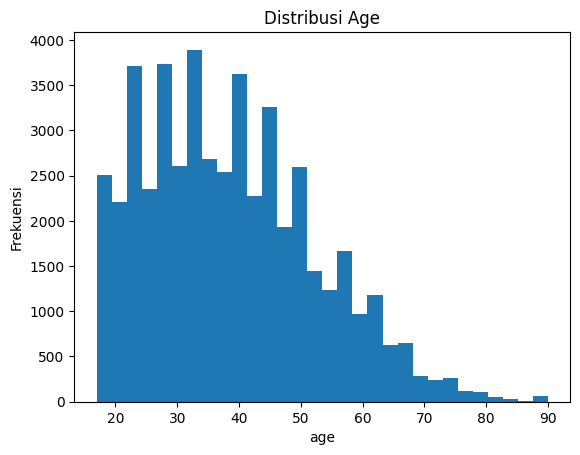

In [123]:
# Jawab 1.1 - Histrogram
plt.figure()
plt.hist(df['age'], bins=30)
plt.title('Distribusi Age')
plt.xlabel('age')
plt.ylabel('Frekuensi')
plt.show()


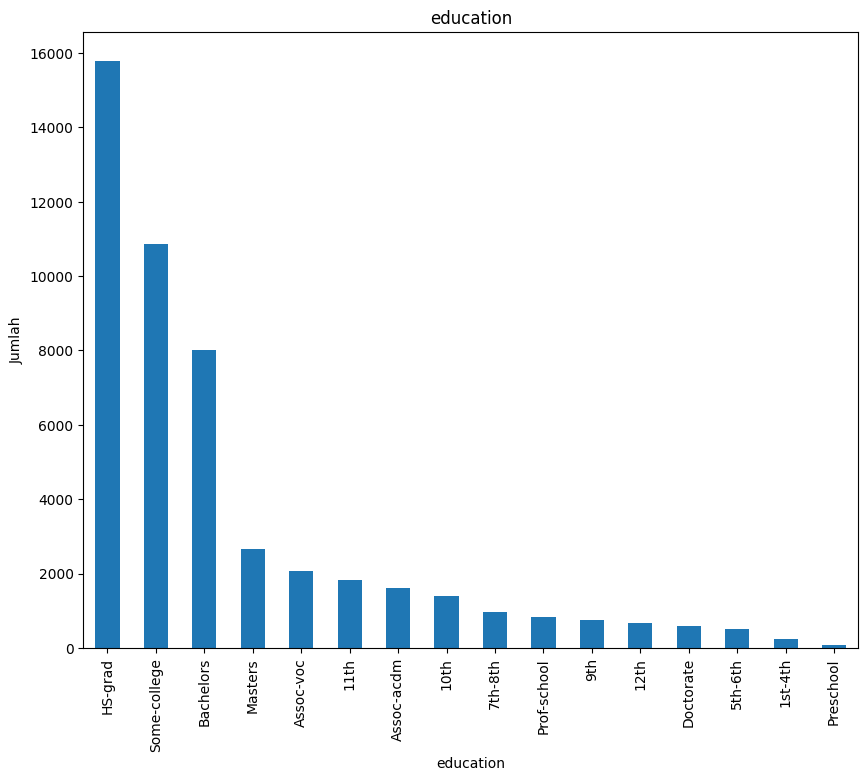

In [124]:
# Jawab 1.2 - Barchart
fig, ax = plt.subplots(figsize=(10, 8))
df['education'].value_counts(dropna=False).plot(kind='bar', ax=ax)
ax.set_title('education')
ax.set_xlabel('education')
ax.set_ylabel('Jumlah')
plt.show()


/tmp/ipython-input-2345578993.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, vert=True, labels=['<=50K', '>50K'])


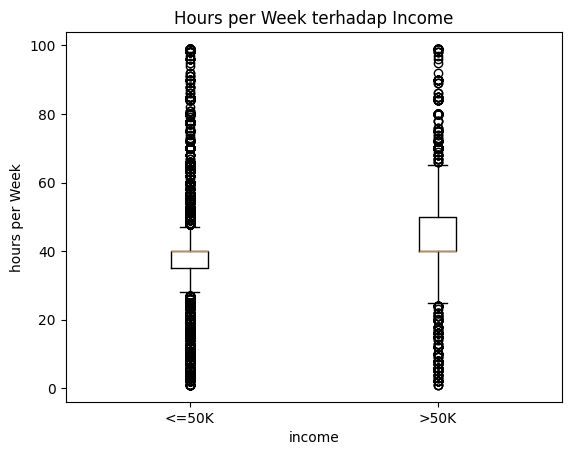

In [103]:
# Jawab 1.3 - Boxplot
plt.figure()
data = [df[df['income'] == '<=50K']['hours-per-week'],
        df[df['income'] == '>50K']['hours-per-week']]

plt.boxplot(data, vert=True, labels=['<=50K', '>50K'])
plt.title('Hours per Week terhadap Income')
plt.xlabel('income')
plt.ylabel('hours per Week')
plt.show()


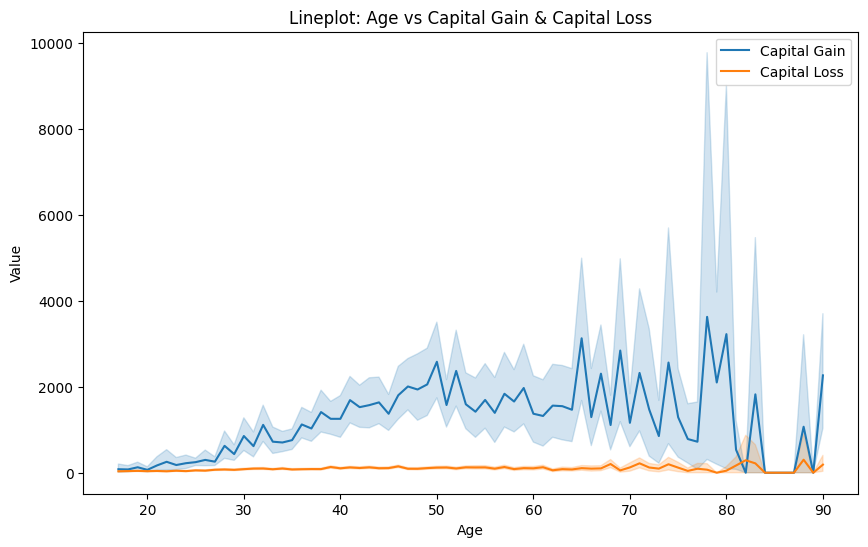

In [105]:
# Jawab 1.4 - Lineplot
plt.figure(figsize=(10, 6))

sns.lineplot(x='age', y='capital-gain', data=df, label='Capital Gain')
sns.lineplot(x='age', y='capital-loss', data=df, label='Capital Loss')

plt.title('Lineplot: Age vs Capital Gain & Capital Loss')
plt.xlabel('Age')
plt.ylabel('Value')
plt.legend()
plt.show()


## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [106]:
# Jawab dengan komentar python
'''
1. tidak ada pekerja dibawah umur 20 tahun, di rentang umur 20 sampai 45 tahun cenderung banyak data pekerja karena termasuk dalam usia produktif. dan di 45 tahun ke atas frekuensi mulai menurun bertahap menandakan usia lanjut banyak yang tidak bekerja
2. bisa menggunakan imputation yaitu mengganti nilai dengan mean, median, modus atau menghapus data yang mengandung nilai nan
3. untuk jumlah belum dipastikan karena sangat banyak titik2 yang tampil dala kedua kategori tersebut, yang paling banyak memiliki outlier yaitu yang memiliki pendapatan <=50k

'''

'\n1. tidak ada pekerja dibawah umur 20 tahun, di rentang umur 20 sampai 45 tahun cenderung banyak data pekerja karena termasuk dalam usia produktif. dan di 45 tahun ke atas frekuensi mulai menurun bertahap menandakan usia lanjut banyak yang tidak bekerja\n2. bisa menggunakan imputation yaitu mengganti nilai dengan mean, median, modus atau menghapus data yang mengandung nilai nan\n3. untuk jumlah belum dipastikan karena sangat banyak titik2 yang tampil dala kedua kategori tersebut, yang paling banyak memiliki outlier yaitu yang memiliki pendapatan <=50k\n\n'

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [129]:
# Jawab Soal 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['income'] = le.fit_transform(df['income'])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

In [130]:
# Jawab Soal 1
cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
corr_matrix = df[cols].corr()
print(corr_matrix)
# Anda diperbolehkan menambah cell jika diperlukan

                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.071558      0.077229   
education-num   0.030940       1.000000        0.143689      0.125146   
hours-per-week  0.071558       0.143689        1.000000      0.082157   
capital-gain    0.077229       0.125146        0.082157      1.000000   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income          0.230369       0.332613        0.227687      0.223013   

                capital-loss    income  
age                 0.056944  0.230369  
education-num       0.080972  0.332613  
hours-per-week      0.054467  0.227687  
capital-gain       -0.031441  0.223013  
capital-loss        1.000000  0.147554  
income              0.147554  1.000000  


In [ ]:
# Hasil analisis jelaskan pada cell ini
'''
korelasi antar tabel numerik
a. age dan income korelasi nya yaitu 0,23 yang sedikit berkaitan dengan pendapatan,
b. education num dan income 0,33 yang menunjukkan bahwa semakin tinggi tingakt pendidikan, cenderung lebih tinggi pendapatan seseorang.
c. hours per week dan income 0,28 yang dimana semakin banyak jam kerja per minggu pendapatan cenderung lebih tinggi
d. capital gain dan income, 0,22 yang dimana bila orang dengan gain tinggi cenderung memiliki pendapatan yang tinggi juga
e. capital loss dan income, 0,14 terlalu lemah sehingga capital loss tidak berpengaruh terhadap income

korelasi antar variabel independen
a. age dengan educationo num, hours per week, capital gain semua korelasi rendah dibawah 1 artinya usia tidak terlalu berkaitan dengan variabel tersebut
b. education num dengan hours per week dan capital gain korelasi 0,1-0,14 korelasi rendah pendidikan sedikit berkaitan dengan jumlah jam kerja dan capital gain
c. capital gain dan capital loss korelasi -0.03 hampir nol yang dimana kedua variabel ini hampir tidak berkaitan
'''

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [1]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


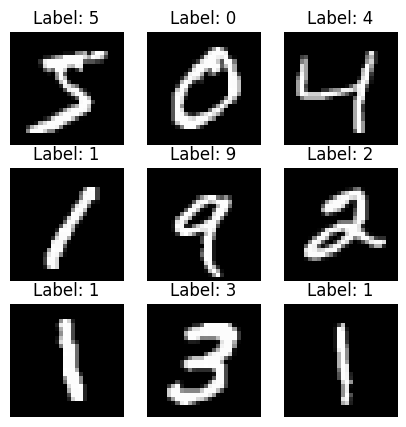

In [2]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Original shape: (10000, 28, 28)
Original image shape: (28, 28)

Melakukan upsampling untuk semua data...
Upsampling selesai!
Upsampled shape: (10000, 32, 32)
Upsampled image shape: (32, 32)


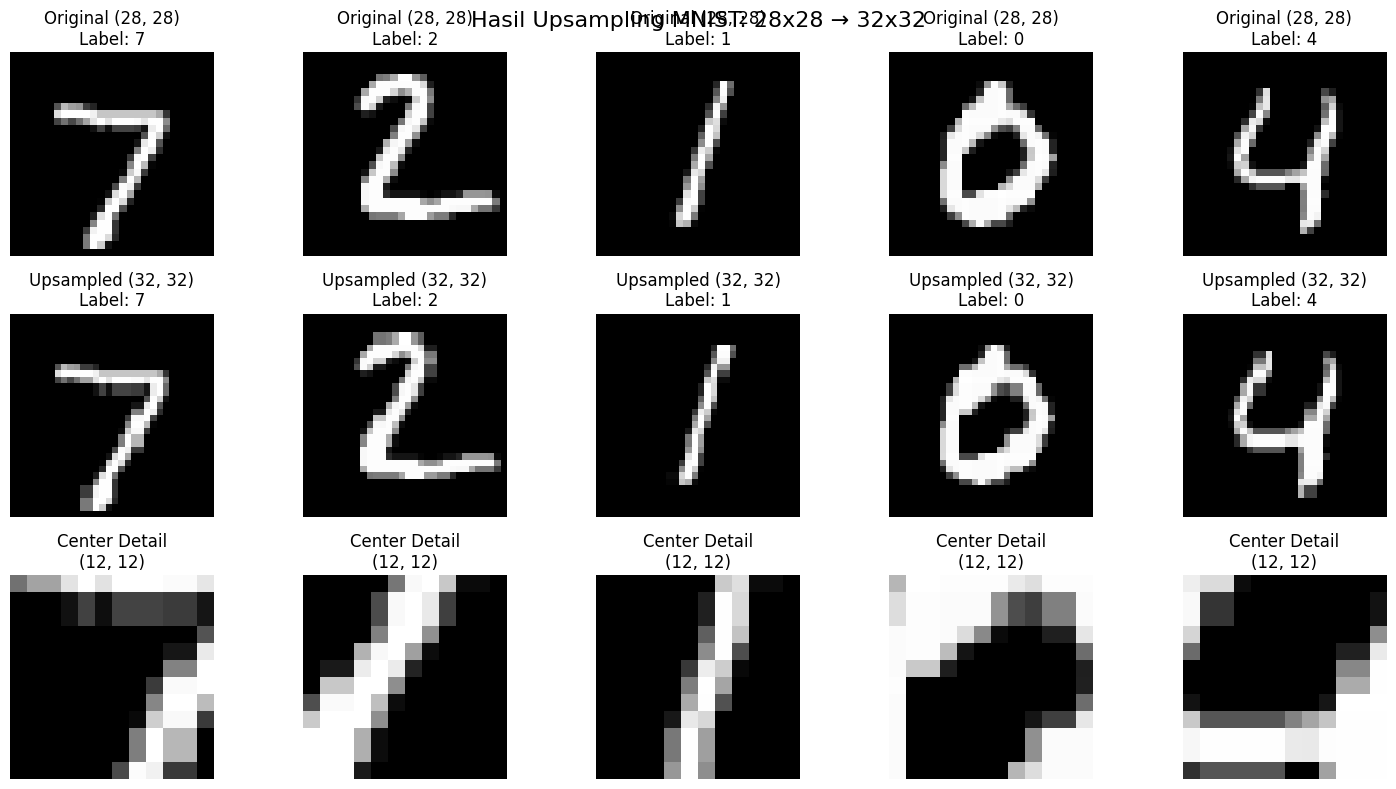


DETAIL HASIL UPSAMPLING
Original shape   : (10000, 28, 28)
Upsampled shape  : (10000, 32, 32)
Scaling factor   : 1.143 (114.3% increase)
Pixel count      : 784 → 1024 (+240 pixels)

STATISTIK PIXEL (5 SAMPLE PERTAMA)

Image 0 (Label: 7):
  Original  - Min:   0, Max: 255, Mean: 23.5
  Upsampled - Min:   0, Max: 255, Mean: 23.0

Image 1 (Label: 2):
  Original  - Min:   0, Max: 255, Mean: 36.8
  Upsampled - Min:   0, Max: 255, Mean: 35.7

Image 2 (Label: 1):
  Original  - Min:   0, Max: 255, Mean: 12.6
  Upsampled - Min:   0, Max: 255, Mean: 11.6

Image 3 (Label: 0):
  Original  - Min:   0, Max: 255, Mean: 47.2
  Upsampled - Min:   0, Max: 255, Mean: 45.3

Image 4 (Label: 4):
  Original  - Min:   0, Max: 255, Mean: 24.5
  Upsampled - Min:   0, Max: 255, Mean: 27.1

VERIFIKASI KUALITAS UPSAMPLING

Analisis gambar index 0 (Label: 7):
Original shape: (28, 28)
Upsampled shape: (32, 32)

Corner pixels comparison:
Original corners: TL=0, TR=0, BL=0, BR=0
Upsampled corners: TL=0, TR=0, BL=0, BR

In [7]:
# Import libraries yang diperlukan
import numpy as np
import matplotlib.pyplot as plt

# Menggunakan data X_test dan y_test yang sudah ada
print("Original shape:", X_test.shape)
print("Original image shape:", X_test[0].shape)

# Fungsi upsampling cepat menggunakan NumPy
def upsample_to_32x32(images):
    """
    Upsampling dari 28x28 ke 32x32 menggunakan nearest neighbor
    """
    n, h, w = images.shape
    target_size = 32

    # Membuat array kosong untuk hasil upsampling
    upsampled = np.zeros((n, target_size, target_size), dtype=images.dtype)

    # Membuat mapping index dari 28x28 ke 32x32
    # Menggunakan linspace untuk distribusi merata
    y_indices = np.round(np.linspace(0, h-1, target_size)).astype(int)
    x_indices = np.round(np.linspace(0, w-1, target_size)).astype(int)

    # Melakukan upsampling menggunakan fancy indexing
    for i in range(n):
        upsampled[i] = images[i][np.ix_(y_indices, x_indices)]

    return upsampled

# 1. Proses Upsampling dari 28x28 ke 32x32
print("\nMelakukan upsampling untuk semua data...")
X_test_upsampled = upsample_to_32x32(X_test)

print("Upsampling selesai!")
print("Upsampled shape:", X_test_upsampled.shape)
print("Upsampled image shape:", X_test_upsampled[0].shape)

# 2. Tampilkan 5 data hasil proses upsampling
plt.figure(figsize=(15, 8))

# Tampilkan perbandingan original vs upsampled
for i in range(5):
    # Original image (28x28)
    plt.subplot(3, 5, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Original {X_test[i].shape}\nLabel: {y_test[i]}')
    plt.axis('off')

    # Upsampled image (32x32)
    plt.subplot(3, 5, i+6)
    plt.imshow(X_test_upsampled[i], cmap='gray')
    plt.title(f'Upsampled {X_test_upsampled[i].shape}\nLabel: {y_test[i]}')
    plt.axis('off')

    # Tampilkan detail pixel di area tengah untuk melihat perbedaan resolusi
    plt.subplot(3, 5, i+11)
    center_crop = X_test_upsampled[i][10:22, 10:22]  # Crop 12x12 dari tengah 32x32
    plt.imshow(center_crop, cmap='gray', interpolation='nearest')
    plt.title(f'Center Detail\n{center_crop.shape}')
    plt.axis('off')

plt.tight_layout()
plt.suptitle('Hasil Upsampling MNIST: 28x28 → 32x32', y=0.98, fontsize=16)
plt.show()

# Menampilkan detail ukuran dan informasi
print("\n" + "="*50)
print("DETAIL HASIL UPSAMPLING")
print("="*50)
print(f"Original shape   : {X_test.shape}")
print(f"Upsampled shape  : {X_test_upsampled.shape}")
print(f"Scaling factor   : {32/28:.3f} ({32/28:.1%} increase)")
print(f"Pixel count      : {28*28} → {32*32} (+{32*32 - 28*28} pixels)")

# Menampilkan statistik pixel untuk 5 sample pertama
print("\n" + "="*50)
print("STATISTIK PIXEL (5 SAMPLE PERTAMA)")
print("="*50)
for i in range(5):
    print(f"\nImage {i} (Label: {y_test[i]}):")
    print(f"  Original  - Min: {X_test[i].min():3d}, Max: {X_test[i].max():3d}, Mean: {X_test[i].mean():.1f}")
    print(f"  Upsampled - Min: {X_test_upsampled[i].min():3d}, Max: {X_test_upsampled[i].max():3d}, Mean: {X_test_upsampled[i].mean():.1f}")

# Verifikasi kualitas upsampling dengan menampilkan satu gambar detail
print("\n" + "="*50)
print("VERIFIKASI KUALITAS UPSAMPLING")
print("="*50)

# Pilih satu gambar untuk analisis detail
sample_idx = 0
print(f"\nAnalisis gambar index {sample_idx} (Label: {y_test[sample_idx]}):")
print(f"Original shape: {X_test[sample_idx].shape}")
print(f"Upsampled shape: {X_test_upsampled[sample_idx].shape}")

# Tampilkan corner pixels untuk melihat mapping
print(f"\nCorner pixels comparison:")
print(f"Original corners: TL={X_test[sample_idx][0,0]}, TR={X_test[sample_idx][0,27]}, BL={X_test[sample_idx][27,0]}, BR={X_test[sample_idx][27,27]}")
print(f"Upsampled corners: TL={X_test_upsampled[sample_idx][0,0]}, TR={X_test_upsampled[sample_idx][0,31]}, BL={X_test_upsampled[sample_idx][31,0]}, BR={X_test_upsampled[sample_idx][31,31]}")

# Simpan hasil untuk penggunaan selanjutnya
print(f"\n✅ Hasil upsampling berhasil disimpan dalam variabel 'X_test_upsampled'")
print(f"   Shape: {X_test_upsampled.shape}")
print(f"   Dtype: {X_test_upsampled.dtype}")
print(f"   Memory usage: {X_test_upsampled.nbytes / (1024*1024):.1f} MB")

print("\n🎯 PROSES UPSAMPLING SELESAI!")
print("   Data siap digunakan untuk tahap selanjutnya.")

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

Data sebelum normalisasi:
Shape: (10000, 32, 32)
Dtype: uint8
Min value: 0
Max value: 255
Range: 0 - 255

Melakukan normalisasi...
Data setelah normalisasi:
Shape: (10000, 32, 32)
Dtype: float32
Min value: 0.000000
Max value: 1.000000
Range: 0.0 - 1.0


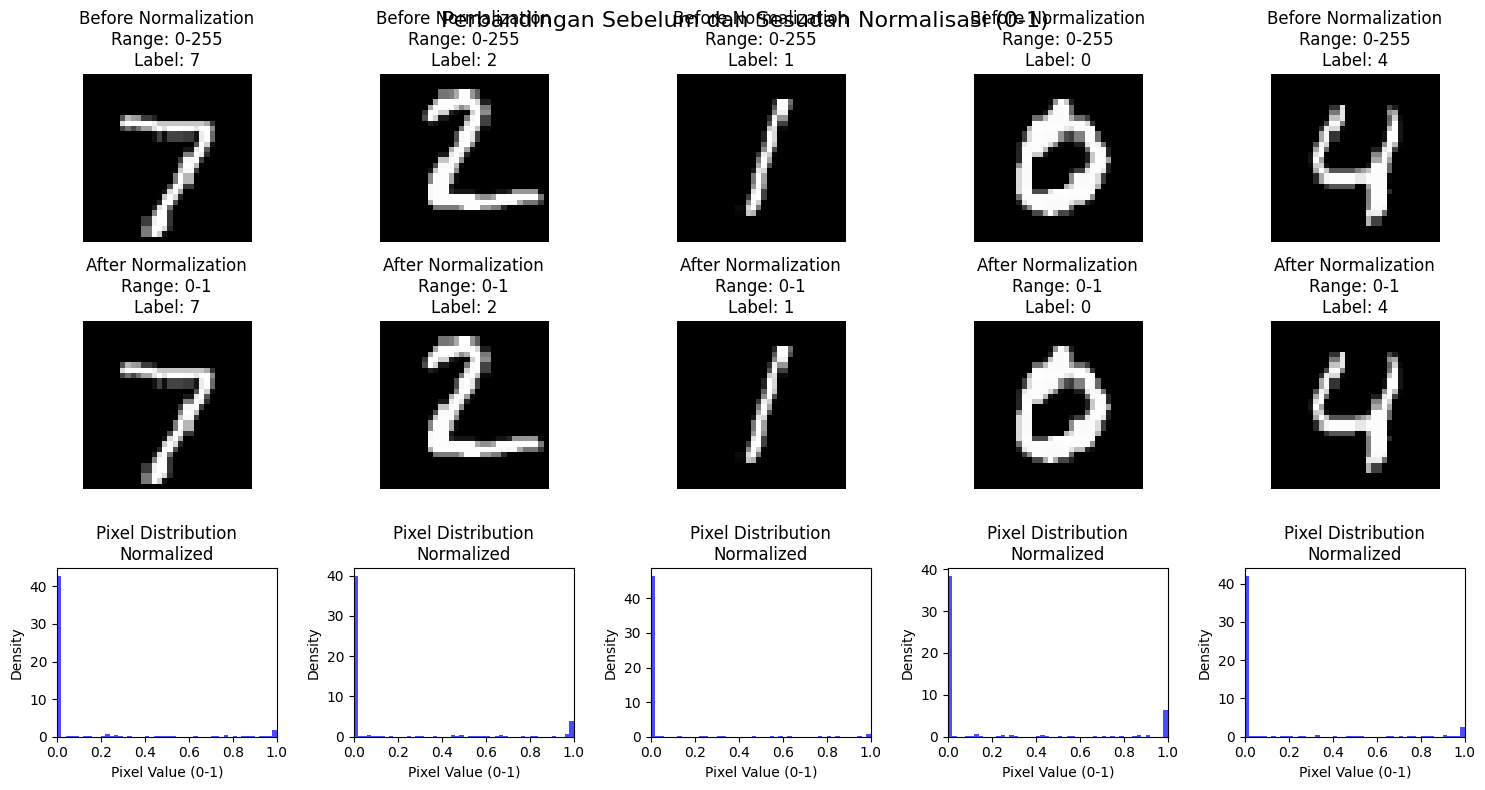


STATISTIK DETAIL NORMALISASI (5 SAMPLE PERTAMA)

Image 0 (Label: 7):
  Before normalization:
    Min:   0, Max: 255, Mean:   23.0, Std:   64.7
  After normalization:
    Min: 0.000000, Max: 1.000000, Mean: 0.090315, Std: 0.253539
    Verification: ✅ Correct

Image 1 (Label: 2):
  Before normalization:
    Min:   0, Max: 255, Mean:   35.7, Std:   80.4
  After normalization:
    Min: 0.000000, Max: 1.000000, Mean: 0.139978, Std: 0.315177
    Verification: ✅ Correct

Image 2 (Label: 1):
  Before normalization:
    Min:   0, Max: 255, Mean:   11.6, Std:   47.3
  After normalization:
    Min: 0.000000, Max: 1.000000, Mean: 0.045542, Std: 0.185350
    Verification: ✅ Correct

Image 3 (Label: 0):
  Before normalization:
    Min:   0, Max: 255, Mean:   45.3, Std:   90.8
  After normalization:
    Min: 0.000000, Max: 1.000000, Mean: 0.177570, Std: 0.355954
    Verification: ✅ Correct

Image 4 (Label: 4):
  Before normalization:
    Min:   0, Max: 255, Mean:   27.1, Std:   70.8
  After normaliz

In [8]:
# Jawab Soal 2
# Import libraries yang diperlukan
import numpy as np
import matplotlib.pyplot as plt

# Menggunakan data X_test_upsampled yang sudah ada dari proses upsampling sebelumnya
print("Data sebelum normalisasi:")
print(f"Shape: {X_test_upsampled.shape}")
print(f"Dtype: {X_test_upsampled.dtype}")
print(f"Min value: {X_test_upsampled.min()}")
print(f"Max value: {X_test_upsampled.max()}")
print(f"Range: {X_test_upsampled.min()} - {X_test_upsampled.max()}")

# Normalisasi citra dari rentang 0-255 ke rentang 0-1
print("\nMelakukan normalisasi...")
X_test_normalized = X_test_upsampled.astype('float32') / 255.0

print("Data setelah normalisasi:")
print(f"Shape: {X_test_normalized.shape}")
print(f"Dtype: {X_test_normalized.dtype}")
print(f"Min value: {X_test_normalized.min():.6f}")
print(f"Max value: {X_test_normalized.max():.6f}")
print(f"Range: {X_test_normalized.min():.1f} - {X_test_normalized.max():.1f}")

# Tampilkan perbandingan 5 gambar sebelum dan sesudah normalisasi
plt.figure(figsize=(15, 8))

for i in range(5):
    # Gambar sebelum normalisasi (0-255)
    plt.subplot(3, 5, i+1)
    plt.imshow(X_test_upsampled[i], cmap='gray', vmin=0, vmax=255)
    plt.title(f'Before Normalization\nRange: 0-255\nLabel: {y_test[i]}')
    plt.axis('off')

    # Gambar setelah normalisasi (0-1)
    plt.subplot(3, 5, i+6)
    plt.imshow(X_test_normalized[i], cmap='gray', vmin=0, vmax=1)
    plt.title(f'After Normalization\nRange: 0-1\nLabel: {y_test[i]}')
    plt.axis('off')

    # Histogram distribusi pixel untuk melihat perubahan
    plt.subplot(3, 5, i+11)
    plt.hist(X_test_normalized[i].flatten(), bins=50, alpha=0.7, color='blue', density=True)
    plt.title(f'Pixel Distribution\nNormalized')
    plt.xlabel('Pixel Value (0-1)')
    plt.ylabel('Density')
    plt.xlim(0, 1)

plt.tight_layout()
plt.suptitle('Perbandingan Sebelum dan Sesudah Normalisasi (0-1)', y=0.98, fontsize=16)
plt.show()

# Statistik detail untuk 5 sample pertama
print("\n" + "="*60)
print("STATISTIK DETAIL NORMALISASI (5 SAMPLE PERTAMA)")
print("="*60)

for i in range(5):
    print(f"\nImage {i} (Label: {y_test[i]}):")
    print(f"  Before normalization:")
    print(f"    Min: {X_test_upsampled[i].min():3d}, Max: {X_test_upsampled[i].max():3d}, Mean: {X_test_upsampled[i].mean():6.1f}, Std: {X_test_upsampled[i].std():6.1f}")
    print(f"  After normalization:")
    print(f"    Min: {X_test_normalized[i].min():.6f}, Max: {X_test_normalized[i].max():.6f}, Mean: {X_test_normalized[i].mean():.6f}, Std: {X_test_normalized[i].std():.6f}")

    # Verifikasi bahwa normalisasi benar
    manual_norm = X_test_upsampled[i].astype('float32') / 255.0
    is_equal = np.allclose(X_test_normalized[i], manual_norm)
    print(f"    Verification: {'✅ Correct' if is_equal else '❌ Error'}")

# Tampilkan informasi tambahan tentang efek normalisasi
print("\n" + "="*60)
print("INFORMASI NORMALISASI")
print("="*60)

print(f"Original data type: {X_test_upsampled.dtype}")
print(f"Normalized data type: {X_test_normalized.dtype}")
print(f"Memory usage before: {X_test_upsampled.nbytes / (1024*1024):.1f} MB")
print(f"Memory usage after: {X_test_normalized.nbytes / (1024*1024):.1f} MB")

# Analisis distribusi keseluruhan
print(f"\nDistribusi pixel keseluruhan:")
print(f"  Before normalization - Mean: {X_test_upsampled.mean():.2f}, Std: {X_test_upsampled.std():.2f}")
print(f"  After normalization  - Mean: {X_test_normalized.mean():.6f}, Std: {X_test_normalized.std():.6f}")

# Contoh nilai pixel spesifik
print(f"\nContoh transformasi nilai pixel:")
sample_pixels = [0, 64, 128, 192, 255]
for pixel_val in sample_pixels:
    normalized_val = pixel_val / 255.0
    print(f"  {pixel_val:3d} → {normalized_val:.6f}")

# Verifikasi tidak ada nilai di luar rentang 0-1
min_val = X_test_normalized.min()
max_val = X_test_normalized.max()
is_valid_range = (min_val >= 0) and (max_val <= 1)

print(f"\nVerifikasi rentang:")
print(f"  Min value: {min_val:.6f} (should be ≥ 0)")
print(f"  Max value: {max_val:.6f} (should be ≤ 1)")
print(f"  Valid range: {'✅ Yes' if is_valid_range else '❌ No'}")

# Simpan hasil normalisasi
print(f"\n" + "="*60)
print("HASIL NORMALISASI")
print("="*60)
print(f"✅ Data berhasil dinormalisasi ke rentang 0-1")
print(f"✅ Hasil disimpan dalam variabel 'X_test_normalized'")
print(f"   Shape: {X_test_normalized.shape}")
print(f"   Dtype: {X_test_normalized.dtype}")
print(f"   Range: {X_test_normalized.min():.1f} - {X_test_normalized.max():.1f}")

print(f"\n🎯 NORMALISASI SELESAI!")
print(f"   Data siap digunakan untuk training model neural network.")
print(f"   Semua nilai pixel sekarang dalam rentang 0-1.")

# Tambahan: Fungsi untuk normalisasi data lain jika diperlukan
def normalize_to_01(data):
    """
    Fungsi untuk normalisasi data ke rentang 0-1

    Parameters:
    data: numpy array dengan nilai 0-255

    Returns:
    normalized_data: numpy array dengan nilai 0-1
    """
    return data.astype('float32') / 255.0

print(f"\n📝 Fungsi 'normalize_to_01()' tersedia untuk normalisasi data lainnya.")

## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

Data sebelum flattening:
Shape: (10000, 32, 32)
Dtype: float32
Dimensi: 3D
Total elemen per gambar: 1024 pixels

Membuat holder array kosong...
Target shape: (10000, 1024)
Holder array berhasil dibuat dengan shape: (10000, 1024)

Melakukan flattening untuk 10000 gambar...
Progress: 1000/10000 gambar selesai
Progress: 2000/10000 gambar selesai
Progress: 3000/10000 gambar selesai
Progress: 4000/10000 gambar selesai
Progress: 5000/10000 gambar selesai
Progress: 6000/10000 gambar selesai
Progress: 7000/10000 gambar selesai
Progress: 8000/10000 gambar selesai
Progress: 9000/10000 gambar selesai
Progress: 10000/10000 gambar selesai
✅ Flattening selesai!

HASIL FLATTENING
Shape sebelum: (10000, 32, 32) (3D)
Shape sesudah: (10000, 1024) (2D)
Dimensi: 3D → 2D
Elemen per gambar: 32×32 = 1024
Total elemen: 10240000

VERIFIKASI INTEGRITAS DATA
Sample 0 (Label: 7):
  Original shape: (32, 32)
  Flattened shape: (1024,)
  Reshaped shape: (32, 32)
  Data integrity: ✅ Preserved
  Sum check: 92.482361 →

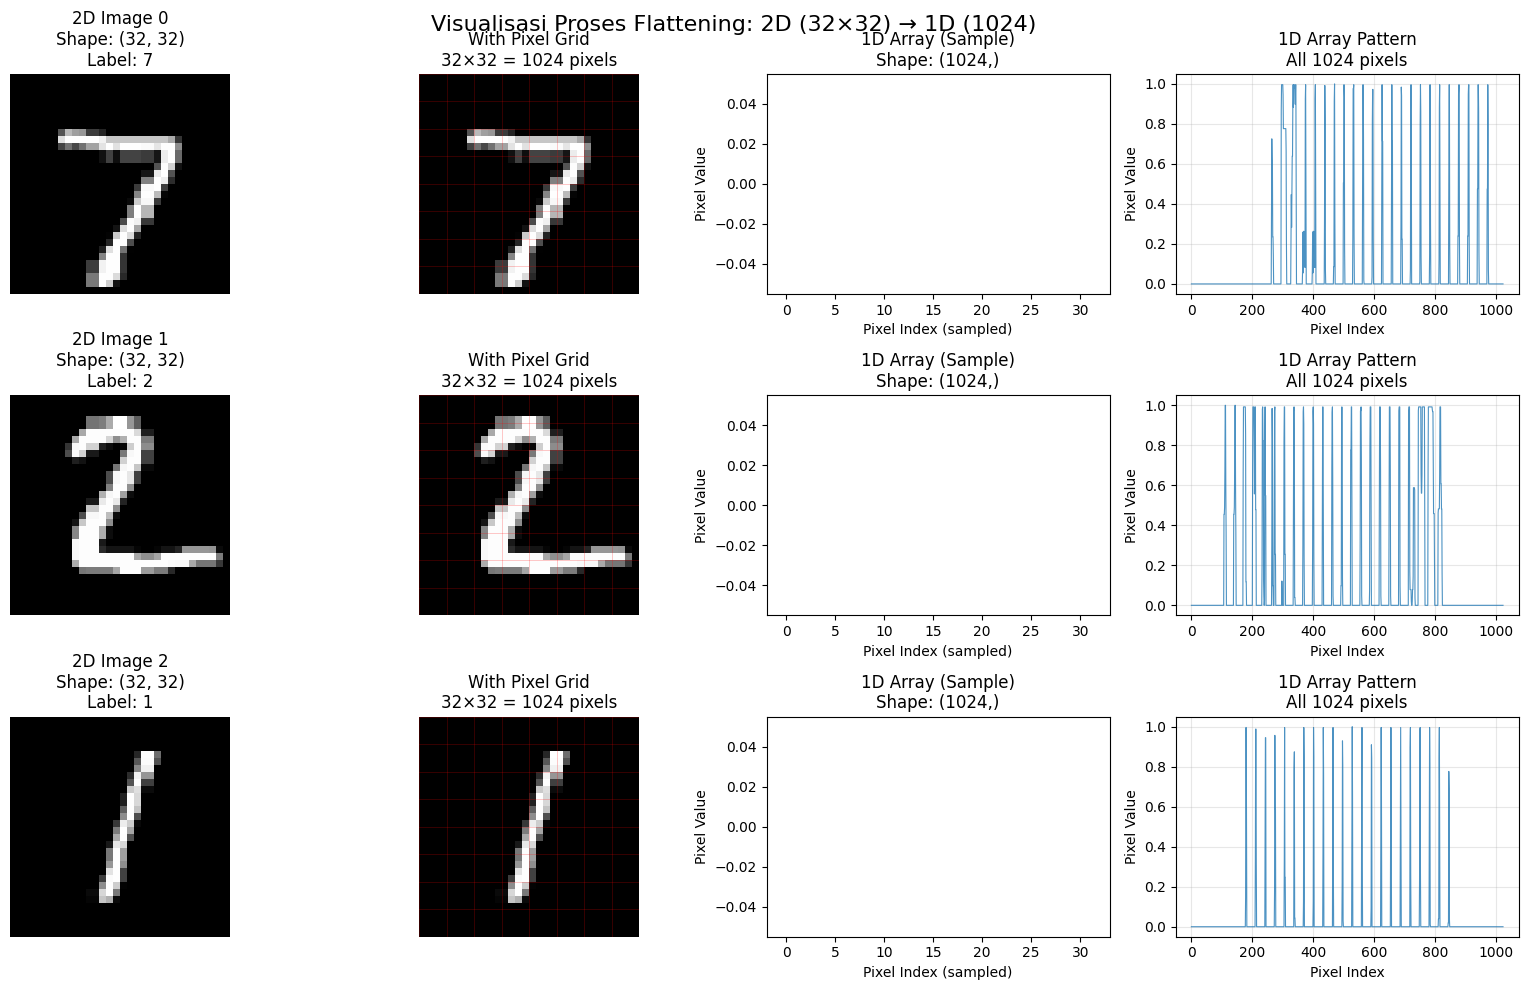


STATISTIK DETAIL
Memory usage:
  Before flattening: 39.1 MB
  After flattening:  39.1 MB
  Memory change: No change (same data, different shape)

Data statistics:
  Min value: 0.000000
  Max value: 1.000000
  Mean value: 0.130780
  Std deviation: 0.308705

Contoh akses data:
  Gambar 0, pixel pertama: 0.000000
  Gambar 0, pixel tengah: 0.000000
  Gambar 0, pixel terakhir: 0.000000

FUNGSI HELPER
Reshape back to 2D: (5, 1024) → (5, 32, 32)
Data sama setelah reshape: ✅ Yes

🎯 FLATTENING SELESAI!
✅ Data berhasil diubah dari 2D ke 1D
✅ Hasil disimpan dalam variabel 'X_test_flattened'
   Shape: (10000, 1024)
   Dtype: float32
   Total features per sample: 1024
   Siap digunakan untuk algoritma ML yang membutuhkan input 1D!

📋 RINGKASAN TRANSFORMASI LENGKAP:
   Original MNIST: (10000, 28, 28) - uint8, range 0-255
   ↓ Upsampling
   Upsampled: (10000, 32, 32) - uint8, range 0-255
   ↓ Normalization
   Normalized: (10000, 32, 32) - float32, range 0-1
   ↓ Flattening
   Flattened: (10000, 1024

In [9]:
# Jawab Soal 3
# Import libraries yang diperlukan
import numpy as np
import matplotlib.pyplot as plt

# Menggunakan data X_test_normalized yang sudah ada (shape: 10000, 32, 32)
print("Data sebelum flattening:")
print(f"Shape: {X_test_normalized.shape}")
print(f"Dtype: {X_test_normalized.dtype}")
print(f"Dimensi: {X_test_normalized.ndim}D")
print(f"Total elemen per gambar: {32 * 32} pixels")

# Membuat holder array kosong untuk menampung hasil flattening
# Shape: (jumlah_gambar, 32*32) = (10000, 1024)
n_samples = X_test_normalized.shape[0]
flattened_size = 32 * 32  # 1024 pixels per gambar

print(f"\nMembuat holder array kosong...")
print(f"Target shape: ({n_samples}, {flattened_size})")

# Membuat array kosong untuk menampung hasil flattening
X_test_flattened = np.zeros((n_samples, flattened_size), dtype=X_test_normalized.dtype)

print(f"Holder array berhasil dibuat dengan shape: {X_test_flattened.shape}")

# Melakukan flattening untuk semua data
print(f"\nMelakukan flattening untuk {n_samples} gambar...")

for i in range(n_samples):
    # Flatten gambar 2D (32x32) menjadi 1D (1024)
    X_test_flattened[i] = X_test_normalized[i].flatten()

    # Progress indicator setiap 1000 gambar
    if (i + 1) % 1000 == 0:
        print(f"Progress: {i + 1}/{n_samples} gambar selesai")

print(f"✅ Flattening selesai!")

# Informasi hasil flattening
print("\n" + "="*60)
print("HASIL FLATTENING")
print("="*60)
print(f"Shape sebelum: {X_test_normalized.shape} (3D)")
print(f"Shape sesudah: {X_test_flattened.shape} (2D)")
print(f"Dimensi: {X_test_normalized.ndim}D → {X_test_flattened.ndim}D")
print(f"Elemen per gambar: {32}×{32} = {flattened_size}")
print(f"Total elemen: {X_test_flattened.size}")

# Verifikasi bahwa data tidak berubah, hanya bentuknya
print("\n" + "="*60)
print("VERIFIKASI INTEGRITAS DATA")
print("="*60)

# Pilih beberapa sampel untuk verifikasi
sample_indices = [0, 1, 2, 3, 4]

for i in sample_indices:
    # Verifikasi bahwa flatten dan reshape menghasilkan data yang sama
    original_2d = X_test_normalized[i]
    flattened_1d = X_test_flattened[i]
    reshaped_2d = flattened_1d.reshape(32, 32)

    # Cek apakah sama
    is_equal = np.allclose(original_2d, reshaped_2d)

    print(f"Sample {i} (Label: {y_test[i]}):")
    print(f"  Original shape: {original_2d.shape}")
    print(f"  Flattened shape: {flattened_1d.shape}")
    print(f"  Reshaped shape: {reshaped_2d.shape}")
    print(f"  Data integrity: {'✅ Preserved' if is_equal else '❌ Corrupted'}")
    print(f"  Sum check: {original_2d.sum():.6f} → {flattened_1d.sum():.6f}")

# Tampilkan visualisasi untuk memahami proses flattening
plt.figure(figsize=(16, 10))

# Tampilkan 3 contoh gambar dengan proses flattening
for idx in range(3):
    sample_idx = idx

    # Gambar 2D original
    plt.subplot(3, 4, idx*4 + 1)
    plt.imshow(X_test_normalized[sample_idx], cmap='gray')
    plt.title(f'2D Image {sample_idx}\nShape: {X_test_normalized[sample_idx].shape}\nLabel: {y_test[sample_idx]}')
    plt.axis('off')

    # Gambar 2D dengan grid untuk menunjukkan pixel
    plt.subplot(3, 4, idx*4 + 2)
    plt.imshow(X_test_normalized[sample_idx], cmap='gray')
    # Tambahkan grid untuk menunjukkan pixel
    for i in range(0, 32, 4):  # Grid setiap 4 pixel
        plt.axhline(y=i-0.5, color='red', alpha=0.3, linewidth=0.5)
        plt.axvline(x=i-0.5, color='red', alpha=0.3, linewidth=0.5)
    plt.title(f'With Pixel Grid\n32×32 = 1024 pixels')
    plt.axis('off')

    # Array 1D sebagai bar chart (sample dari 1024 elemen)
    plt.subplot(3, 4, idx*4 + 3)
    sample_pixels = X_test_flattened[sample_idx][::32]  # Ambil setiap 32 elemen
    plt.bar(range(len(sample_pixels)), sample_pixels, alpha=0.7)
    plt.title(f'1D Array (Sample)\nShape: ({X_test_flattened[sample_idx].shape[0]},)')
    plt.xlabel('Pixel Index (sampled)')
    plt.ylabel('Pixel Value')

    # Array 1D sebagai line plot (untuk melihat pola)
    plt.subplot(3, 4, idx*4 + 4)
    plt.plot(X_test_flattened[sample_idx], alpha=0.8, linewidth=0.8)
    plt.title(f'1D Array Pattern\nAll {flattened_size} pixels')
    plt.xlabel('Pixel Index')
    plt.ylabel('Pixel Value')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Visualisasi Proses Flattening: 2D (32×32) → 1D (1024)', y=0.98, fontsize=16)
plt.show()

# Statistik detail
print("\n" + "="*60)
print("STATISTIK DETAIL")
print("="*60)

print(f"Memory usage:")
print(f"  Before flattening: {X_test_normalized.nbytes / (1024*1024):.1f} MB")
print(f"  After flattening:  {X_test_flattened.nbytes / (1024*1024):.1f} MB")
print(f"  Memory change: No change (same data, different shape)")

print(f"\nData statistics:")
print(f"  Min value: {X_test_flattened.min():.6f}")
print(f"  Max value: {X_test_flattened.max():.6f}")
print(f"  Mean value: {X_test_flattened.mean():.6f}")
print(f"  Std deviation: {X_test_flattened.std():.6f}")

# Contoh akses data
print(f"\nContoh akses data:")
print(f"  Gambar 0, pixel pertama: {X_test_flattened[0, 0]:.6f}")
print(f"  Gambar 0, pixel tengah: {X_test_flattened[0, 512]:.6f}")
print(f"  Gambar 0, pixel terakhir: {X_test_flattened[0, -1]:.6f}")

# Fungsi helper untuk konversi bolak-balik
def reshape_to_2d(flattened_data, height=32, width=32):
    """
    Mengubah data 1D kembali ke 2D
    """
    return flattened_data.reshape(-1, height, width)

def reshape_to_1d(image_2d):
    """
    Mengubah data 2D ke 1D
    """
    return image_2d.reshape(-1, image_2d.shape[-2] * image_2d.shape[-1])

# Demonstrasi fungsi helper
print(f"\n" + "="*60)
print("FUNGSI HELPER")
print("="*60)

# Test reshape back to 2D
test_2d = reshape_to_2d(X_test_flattened[:5])
print(f"Reshape back to 2D: {X_test_flattened[:5].shape} → {test_2d.shape}")

# Verifikasi
is_same = np.allclose(test_2d, X_test_normalized[:5])
print(f"Data sama setelah reshape: {'✅ Yes' if is_same else '❌ No'}")

print(f"\n🎯 FLATTENING SELESAI!")
print(f"✅ Data berhasil diubah dari 2D ke 1D")
print(f"✅ Hasil disimpan dalam variabel 'X_test_flattened'")
print(f"   Shape: {X_test_flattened.shape}")
print(f"   Dtype: {X_test_flattened.dtype}")
print(f"   Total features per sample: {flattened_size}")
print(f"   Siap digunakan untuk algoritma ML yang membutuhkan input 1D!")

# Ringkasan transformasi lengkap
print(f"\n📋 RINGKASAN TRANSFORMASI LENGKAP:")
print(f"   Original MNIST: (10000, 28, 28) - uint8, range 0-255")
print(f"   ↓ Upsampling")
print(f"   Upsampled: (10000, 32, 32) - uint8, range 0-255")
print(f"   ↓ Normalization")
print(f"   Normalized: (10000, 32, 32) - float32, range 0-1")
print(f"   ↓ Flattening")
print(f"   Flattened: (10000, 1024) - float32, range 0-1 ✅")